In [1]:
import numpy as np
import pandas as pd
import quandl,math
from sklearn import preprocessing,model_selection,svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

In [2]:
style.use('ggplot')

In [3]:
df=quandl.get('WIKI/GOOGL')

In [4]:
print(df)

               Open     High      Low     Close      Volume  Ex-Dividend  \
Date                                                                       
2004-08-19   100.01   104.06    95.96   100.335  44659000.0          0.0   
2004-08-20   101.01   109.08   100.50   108.310  22834300.0          0.0   
2004-08-23   110.76   113.48   109.05   109.400  18256100.0          0.0   
2004-08-24   111.24   111.60   103.57   104.870  15247300.0          0.0   
2004-08-25   104.76   108.00   103.88   106.000   9188600.0          0.0   
...             ...      ...      ...       ...         ...          ...   
2018-03-21  1092.57  1108.70  1087.21  1094.000   1990515.0          0.0   
2018-03-22  1080.01  1083.92  1049.64  1053.150   3418154.0          0.0   
2018-03-23  1051.37  1066.78  1024.87  1026.550   2413517.0          0.0   
2018-03-26  1050.60  1059.27  1010.58  1054.090   3272409.0          0.0   
2018-03-27  1063.90  1064.54   997.62  1006.940   2940957.0          0.0   

           

In [6]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']=(df['Adj. High']-df["Adj. Low"])/df['Adj. Close']*100.0
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

C:\Users\Aitra Mondal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aitra Mondal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [9]:
forecast_col='Adj. Close'
df.fillna(value=-99999,inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))
df['label']=df[forecast_col].shift(-forecast_out)

In [12]:
X=np.array(df.drop(['label'],1))
X=preprocessing.scale(X)
X_lately=X[-forecast_out:]
X=X[:-forecast_out]
print(X)
print(X_lately)

[[-1.39187095  4.25846492  0.23254018  4.46712802]
 [-1.37635178  4.15018674  4.81828847  1.8207495 ]
 [-1.37423066  1.3780063  -0.79917922  1.26561472]
 ...
 [ 2.99737935 -0.42487551  0.33301614 -0.61156746]
 [ 2.7553098  -0.23328983 -0.46778619 -0.24489949]
 [ 2.55960556  2.38088557 -1.90605746 -0.49425191]]
[[ 2.62040424  2.26641124  3.25839716 -0.49545744]
 [ 2.50780834  0.64357973 -1.79354019 -0.6394908 ]
 [ 2.31454846  2.66581649 -3.38541422 -0.57613569]
 [ 2.46132664  2.2334127   1.15324503 -0.41015315]
 [ 2.50451039 -0.1577593  -0.11604074 -0.60898579]
 [ 2.50288082 -0.54974983  0.27859553 -0.75717739]
 [ 2.57489253  0.19225109  1.17488957 -0.70190181]
 [ 2.64729224  0.24167535  0.50169569 -0.72903566]
 [ 2.66335519 -0.42565789  0.14545442 -0.70894085]
 [ 2.69474392  0.18451827  0.67510086 -0.74841251]
 [ 2.73416412  0.32322713  0.2951878  -0.70256205]
 [ 2.71922635 -0.2108907  -0.53369123 -0.77997427]
 [ 2.78980248 -0.2161489   0.57670541 -0.79835378]
 [ 2.85036837 -0.59074485

In [13]:
df.dropna(inplace=True)

In [16]:
y=np.array(df['label'])

In [17]:

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)
clf=LinearRegression(n_jobs=-1)
clf.fit(X_train,Y_train)
confidence=clf.score(X_test,Y_test)

In [18]:
forecast_set=clf.predict(X_lately)
df["Forecast"]=np.nan

In [20]:
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

In [23]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=86400
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

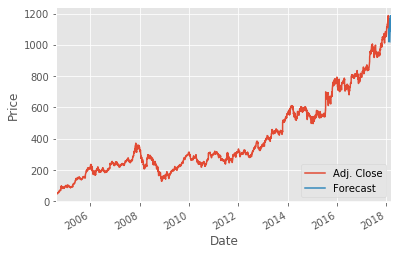

In [25]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()